# PART I

## SETUP

In [252]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.style.use('ggplot')
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams["legend.edgecolor"] = 'black'
plt.rcParams["legend.fontsize"] = 13

## DATA PROCESSING

In [253]:
def normalize(data, column, mu_dict, sigma_dict):
    return (data[column] - mu_dict[column])/sigma_dict[column]

        
def dataProcessing(data, mu_dict, sigma_dict):
    data.insert(loc=0, column="bias", value=1)
        
    # Drop unused features
    data = data.drop(columns=["id", "date", "yr_renovated"])
    
    for column in data: 
        if column not in ['bias', 'waterfront', 'price']:
            data[column] = normalize(data, column, mu_dict, sigma_dict)
    
    return data


def dateSplit(data):
    data['month'] = [int(x.split("/")[0]) for x in data['date'].values] # month
    data['day'] = [int(x.split("/")[1]) for x in data['date'].values] # day
    data['year'] = [int(x.split("/")[2]) for x in data['date'].values] # year
    return data


def reno(data):
    data['age_since_renovated'] = data.apply(lambda d: ((d["year"] - d["yr_built"]) if (d["yr_renovated"] == 0) 
                                                        else (d["year"] - d["yr_renovated"])), axis=1)
    return data

In [254]:
data = pd.read_csv("../input/ia1/PA1_train1.csv")
test_data = pd.read_csv("../input/ia1/PA1_test1.csv")

# np.random.seed(seed=1)
train_mask = np.random.rand(len(data)) < 0.8
train_data = pd.DataFrame(data[train_mask])
val_data = pd.DataFrame(data[~train_mask])

# n_train_data = int(len(data) * 0.8)
# train_data = pd.DataFrame(data[:n_train_data])
# val_data = pd.DataFrame(data[n_train_data:])

# Split date
train_data = dateSplit(train_data)
val_data = dateSplit(val_data)
test_data = dateSplit(test_data)

# Age since renovated
train_data = reno(train_data)
val_data = reno(val_data)
test_data = reno(test_data)

# Find mu and sigma for train -> put into dict
mu_dict = {}
sigma_dict = {}

for col in train_data.columns.values:
    if col not in ['id', 'date']:
        mu_dict[col] = train_data[col].mean()
        sigma_dict[col] = train_data[col].std()

# Finish process data
pp_train_data = dataProcessing(train_data, mu_dict, sigma_dict)
pp_val_data = dataProcessing(val_data, mu_dict, sigma_dict)
pp_test_data = dataProcessing(test_data, mu_dict, sigma_dict)

In [255]:
pp_train_data.head()

,bias,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,month,day,year,age_since_renovated
0,1,0.695896,0.493046,0.690586,-0.124614,0.918872,0,-0.301018,-0.617555,1.120508,...,-0.086468,0.505154,1.207275,1.045158,-0.073180,5.9495,0.136049,-0.783076,-0.689123,-0.552980
1,1,-1.538588,0.493046,0.560144,-0.239954,-0.928295,0,-0.301018,2.438657,0.276741,...,0.883597,0.151104,-1.168458,0.382063,-0.270317,6.6500,0.136049,0.259656,-0.689123,1.627466
2,1,1.813138,-0.483849,-0.472522,-0.286035,-0.004712,0,-0.301018,-0.617555,0.276741,...,1.219389,0.258984,-0.653834,-0.367523,-0.304549,4.4300,0.136049,-1.014795,-0.689123,2.458112
3,1,0.695896,-0.483849,-0.396431,-0.133968,-0.928295,0,-0.301018,0.910551,0.276741,...,-0.366294,-0.603334,0.410664,-0.482844,-0.074515,3.8000,-0.830726,1.418247,1.450939,0.173835
4,1,2.930380,0.167414,1.897174,-0.097565,-0.928295,0,2.385583,2.438657,1.120508,...,-1.317704,0.182237,0.706749,0.728026,-0.085469,8.8700,0.780565,-1.362372,-0.689123,0.381497


In [256]:
pp_val_data.head()

pp_val_data.columns

Index(['bias', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'price', 'month', 'day', 'year', 'age_since_renovated'],
      dtype='object')

In [257]:
pp_test_data.head()

,bias,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month,day,year,age_since_renovated
0,1,-0.421346,0.167414,0.527533,-0.188298,0.918872,0,-0.301018,-0.617555,-0.567025,...,-0.678178,0.864942,1.167641,-0.745479,-0.439599,-0.179981,1.747340,-0.783076,-0.689123,-0.622201
1,1,-0.421346,-0.158217,-0.439912,-0.168990,-0.928295,0,-0.301018,-0.617555,0.276741,...,0.542246,-0.086468,0.413203,1.186126,-0.281033,-0.184637,-1.475243,0.259656,1.450939,-0.449150
2,1,-0.421346,0.493046,1.603680,-0.129453,-0.928295,0,-0.301018,-0.617555,0.276741,...,-0.203568,-1.336359,0.296634,0.481161,0.309987,-0.135960,-0.830726,-1.478231,1.450939,0.312276
3,1,-1.538588,-1.460743,-1.005160,-0.216914,-0.928295,0,-0.301018,0.910551,-0.567025,...,-0.983283,0.678391,0.943192,-0.555138,-0.958543,-0.236086,-0.508468,1.302388,-0.689123,1.073702
4,1,-0.421346,-0.158217,-0.211638,-0.031669,0.918872,0,-0.301018,-0.617555,-0.567025,...,0.779550,-1.112498,1.216151,1.771247,-0.151297,0.038379,0.136049,1.765825,-0.689123,-0.726032


In [258]:
pp_test_data.columns

Index(['bias', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month', 'day', 'year', 'age_since_renovated'],
      dtype='object')

## DATA EXPLORATION

### Feature Correlation (Report Only)

In [259]:
import seaborn as sns

# Split date
pp_data = dateSplit(data)

# Age since renovated
pp_data = reno(pp_data)

pp_data = dataProcessing(pp_data, mu_dict, sigma_dict)

corr_matrix = pp_data.corr()
# plt.figure(figsize=(14,12))
# sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='BuPu')
# plt.show()



In [260]:
corr_matrix["price"]

bias                        NaN
bedrooms               0.304994
bathrooms              0.524480
sqft_living            0.693156
sqft_lot               0.090327
floors                 0.265757
waterfront             0.222654
view                   0.392961
condition              0.051306
grade                  0.671957
sqft_above             0.605777
sqft_basement          0.295117
yr_built               0.057532
zipcode               -0.048750
lat                    0.307248
long                   0.025544
sqft_living15          0.589190
sqft_lot15             0.085476
price                  1.000000
month                 -0.008468
day                   -0.024775
year                   0.001692
age_since_renovated   -0.099004
Name: price, dtype: float64

# MODEL TRAIN

## Feature Selection

<AxesSubplot:ylabel='Frequency'>

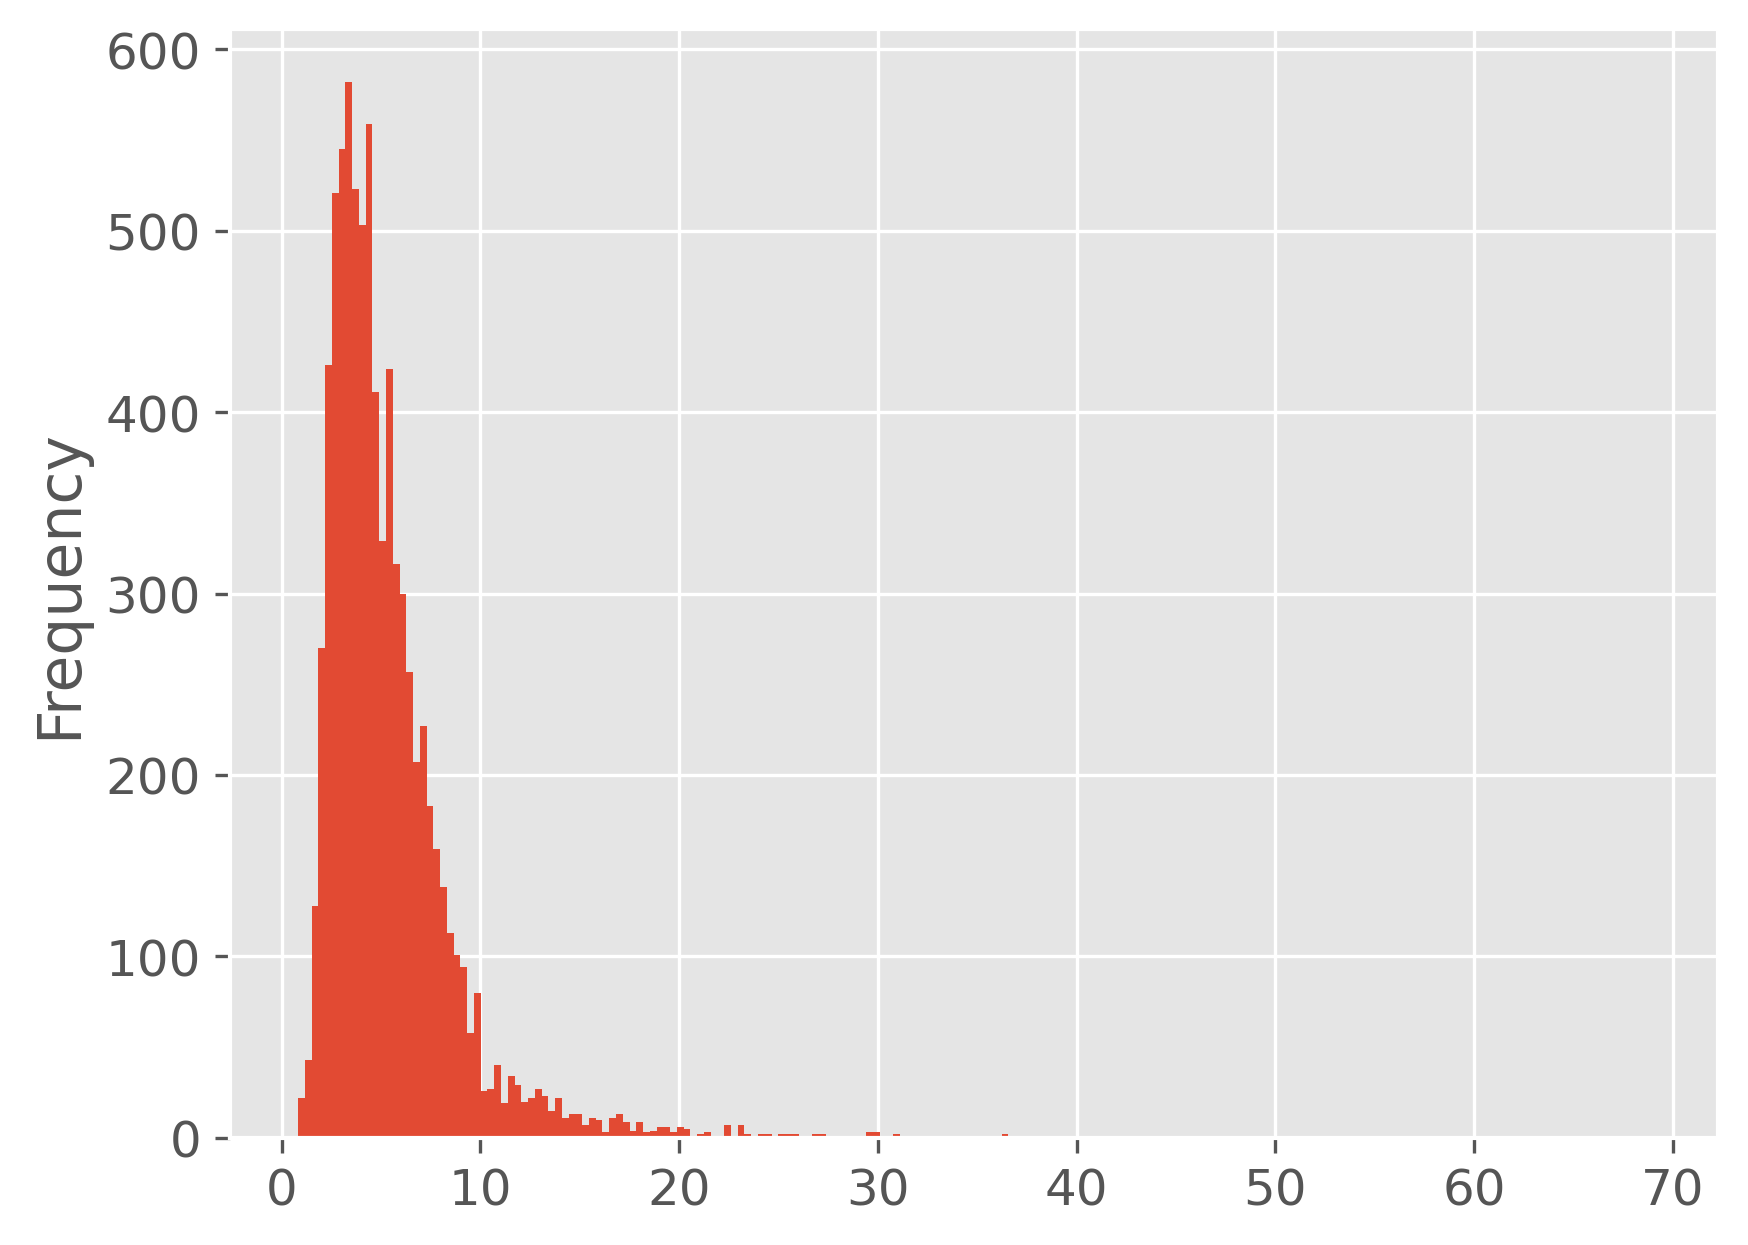

In [261]:
train_data["price"].plot.hist(bins=200)

## Hyperparameter Tuning

In [262]:
pp_train_data.columns

len(pp_train_data[pp_train_data["price"] < 14.44]) / len(pp_train_data)

# pp_train_data["price"].min()

0.9747418190867239

In [263]:
def fit(X, y, n_iters: int, lr: float, epsilon_low: float, epsilon_high: float):
    converge = True
    n = X.shape[0]
    n_features = X.shape[1]
    w = np.zeros(n_features).reshape(n_features,1)
    
    mse_train = []
    
    for iter in range(n_iters):
        # Rename the product to match y label
        y_hat = (X.dot(w)).rename(columns={0: "price"})
        
        grads = 2/n * X.T.dot(y_hat - y)
        w = w - lr * grads
        
        y_pred = (X.dot(w)).rename(columns={0: "price"})
        mse = float(((y - y_pred) ** 2).sum() / n)
        mse_train.append(mse)
        
        magLw = np.linalg.norm(grads.values)
        
        # Early stop due to tiny change or diverging
        if magLw < epsilon_low:
            print("Learning rate %s plateau at iter #%d, magLW = %f" % (str(lr), iter, magLw))
            break
        
        if magLw > epsilon_high:
            print("Learning rate %s Diverge at iter #%d, magLw = %f" % (str(lr), iter, magLw))
            converge = False
            break
        
    return converge, mse_train, w

y_train = pp_train_data["price"].to_frame()
# X_train = pp_train_data[pp_train_data["price"] < 14.44]

# y_train = y_train[y_train["price"] < 14.44]

# Drop unused features
features = pp_train_data.columns.drop(["price"])
# features = pp_train_data.columns.drop(["price", "long"])
n_features = len(features)

X_train = pp_train_data[features]

X_val = pp_val_data[features]
y_val = pp_val_data["price"].to_frame()

d_train_mse = {}
d_w = {}
l_diverge = []

# learning_rates = [10**(-1),10**(-2),10**(-3)]
# learning_rates = [1, 0.5, 10**(-1)]
learning_rates = [1,0.5,0.0025,0.005,0.0075,
                  10**(-1),10**(-2),10**(-3),10**(-4),
                  0.15, 0.2, 0.3]
for lr in learning_rates:
    converge, mse_train, w = fit(X_train, y_train, n_iters=4000,
                                                lr=lr,
                                                epsilon_low=10**(-6), epsilon_high=10**10)
    
    l_diverge.append(not converge)
    d_train_mse[str(lr)] = mse_train
    d_w[str(lr)] = w


Learning rate 1 Diverge at iter #9, magLw = 14072211207.923649
Learning rate 0.5 Diverge at iter #14, magLw = 25612170531.410908
Learning rate 0.2 Diverge at iter #84, magLw = 12010008244.874027
Learning rate 0.3 Diverge at iter #24, magLw = 16603597687.107334


## Using scikit-learn

In [264]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_val)

print(y_pred)
len(y_pred)

print("MSE: %.2f" % mean_squared_error(y_val, y_pred))
print("w: " + str(lin_reg.coef_))


[[1.87905444]
 [2.41181249]
 [3.20600158]
 ...
 [3.8822036 ]
 [1.50852002]
 [5.65352611]]
MSE: 3.33
w: [[ 0.         -0.34850262  0.39201262  0.81284526  0.08624078 -0.01272718
   4.7549091   0.44051115  0.21581629  1.11091272  0.79415465  0.18719855
  -0.90467546 -0.28423702  0.83874876 -0.33963387  0.15001489 -0.12965292
   0.06685152 -0.03967618  0.19274656 -0.151206  ]]


In [265]:
# X_train[X_train["price"] < 14.44]
# X_train
# pp_train_data

In [266]:
cur_min = 1000000
best_model = " "
print("Figure 2:\n")

d_val_mse = {}

for i, (lr, w) in enumerate(d_w.items()):
    if not l_diverge[i]:
        y_pred = (X_val.dot(w)).rename(columns={0: "prices"})
        mse = float(((y_val - y_pred) ** 2).sum() / len(y_val))
        print("Learning Rate:", lr + ", MSE:", mse)
        
        d_val_mse[str(lr)] = mse
        
        if mse < cur_min:
            cur_min = mse
            best_model = lr
            
print("Best model has a learning rate of: %f, with MSE = %f" % (float(best_model), 
    d_val_mse[best_model]))


Figure 2:

Learning Rate: 0.0025, MSE: 3.449158962028451
Learning Rate: 0.005, MSE: 3.4314402462124693
Learning Rate: 0.0075, MSE: 3.4123099171975095
Learning Rate: 0.1, MSE: 3.3317404442182594
Learning Rate: 0.01, MSE: 3.3961715524345477
Learning Rate: 0.001, MSE: 3.4384604345179812
Learning Rate: 0.0001, MSE: 9.691529038657515
Learning Rate: 0.15, MSE: 3.3318077457095607
Best model has a learning rate of: 0.100000, with MSE = 3.331740


## Retrain with all data 

In [267]:
converge, mse_train, w = fit(X_train, y_train, n_iters=4000,
                                                lr=float(best_model),
                                                epsilon_low=10**(-6), epsilon_high=10**10)

# SUBMISSION

In [268]:
X_test = pp_test_data[features]

# X_test
y_pred = (X_test.dot(w)).rename(columns={0: "prices"})

print(w)
# print(X_test.head())
# X_test
# type(y_pred["price"])
# y_pred
my_submission = pd.DataFrame({'Id': test_data.id, 'price': y_pred["price"]})
# # you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

                        price
bias                 5.355796
bedrooms            -0.348722
bathrooms            0.392042
sqft_living          0.813036
sqft_lot             0.086032
floors              -0.012701
waterfront           4.694821
view                 0.442417
condition            0.215878
grade                1.110518
sqft_above           0.794469
sqft_basement        0.186998
yr_built            -0.905108
zipcode             -0.284303
lat                  0.838715
long                -0.339790
sqft_living15        0.149909
sqft_lot15          -0.129502
month                0.066869
day                 -0.039625
year                 0.192715
age_since_renovated -0.151654
